In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2757,2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2758,2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500
2759,2022-12-19,90.879997,91.199997,88.925003,89.150002,89.150002,23020500


In [6]:
ma_100_days = data.Close.rolling(100).mean()

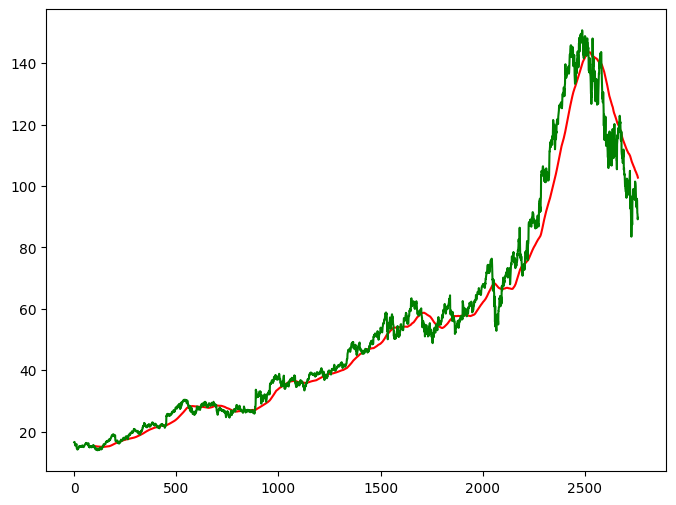

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

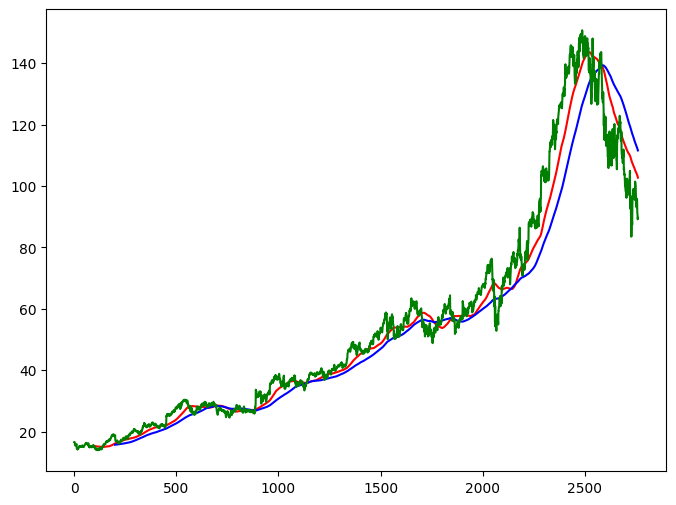

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[:int(len(data)*.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*.8):])

In [12]:
data_test

,Close
2208,78.457497
2209,78.584000
2210,78.403999
2211,77.956497
2212,78.650497
...,...
2756,95.309998
2757,91.199997
2758,90.860001
2759,89.150002


In [13]:
data_train.shape[0] , data_test.shape[0]

(2208, 553)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [19]:
x, y = np.array(x) , np.array(y)

In [20]:
model = Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [21]:
model.compile(optimizer='adam',
              loss = 'mean_squared_error')

In [22]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 [==============================] - 17s 205ms/step - loss: 0.0290
Epoch 2/50
66/66 [==============================] - 14s 214ms/step - loss: 0.0074
Epoch 3/50
66/66 [==============================] - 13s 202ms/step - loss: 0.0063
Epoch 4/50
66/66 [==============================] - 13s 196ms/step - loss: 0.0055
Epoch 5/50
66/66 [==============================] - 14s 214ms/step - loss: 0.0050
Epoch 6/50
66/66 [==============================] - 14s 215ms/step - loss: 0.0044
Epoch 7/50
66/66 [==============================] - 14s 219ms/step - loss: 0.0047
Epoch 8/50
66/66 [==============================] - 15s 222ms/step - loss: 0.0042
Epoch 9/50
66/66 [==============================] - 14s 218ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 14s 209ms/step - loss: 0.0040
Epoch 11/50
66/66 [==============================] - 14s 218ms/step - loss: 0.0039
Epoch 12/50
66/66 [==============================] - 15s 226ms/step - loss: 0.0034
Epoch 13/50
6

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [30]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [31]:
data_test_scale = scaler.fit_transform(data_test)

In [32]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [33]:
x, y = np.array(x) , np.array(y)

In [34]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 64ms/step


In [37]:
1/scaler.scale_

array([82.71399689])

In [38]:
y_predict = y_predict*(1/scaler.scale_)

In [39]:
y = y * (1/scaler.scale_)

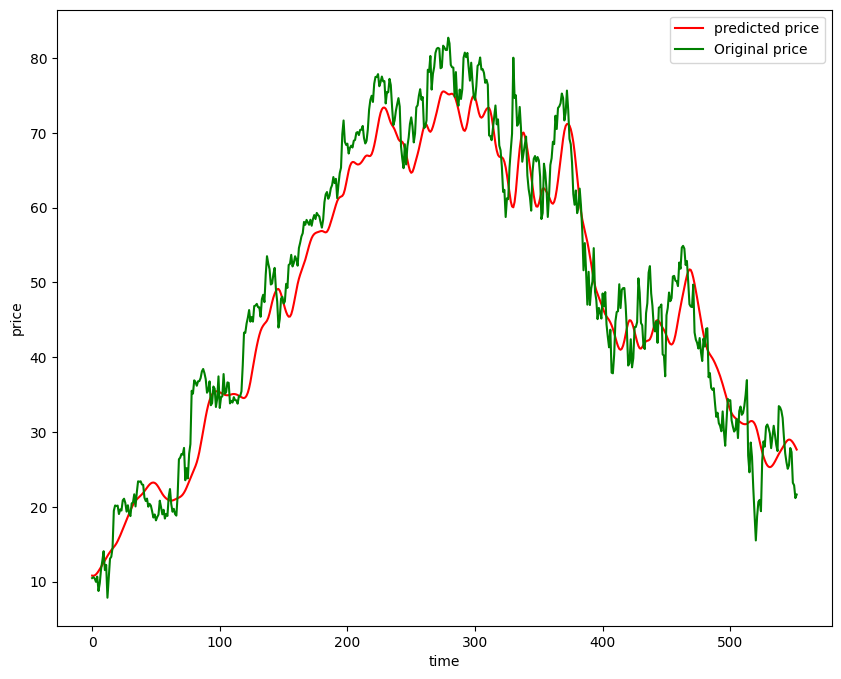

In [40]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='predicted price')
plt.plot(y,'g',label = 'Original price')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [41]:
model.save('Stock Predictions Model.keras')